In [9]:
import pandas as pd
import numpy as np
import seaborn as sns


In [10]:
df = pd.read_csv('./data/DATA/fake_reg.csv')

In [11]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

C:\learnings\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


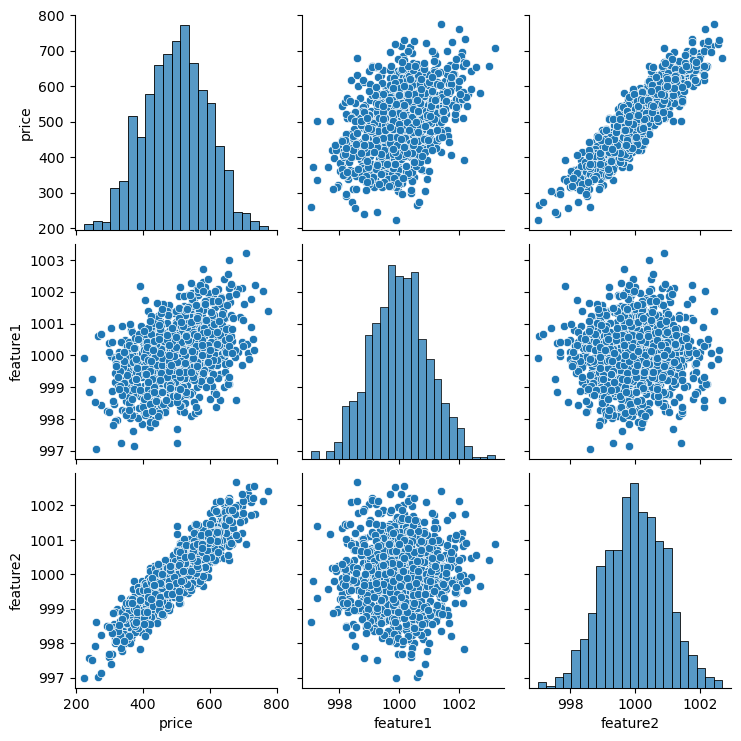

In [12]:
sns.pairplot(df)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['feature1', 'feature2']].values

In [16]:
y = df['price'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
#help(MinMaxScaler)

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train = scaler.transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_train.max()

1.0

In [28]:
from tensorflow.keras.models import Sequential


In [29]:
from tensorflow.keras.layers import Dense

In [30]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [44]:
model = Sequential([Dense(4, activation='relu'), Dense(4, activation='relu'), Dense(4, activation='relu'),Dense(1, activation='relu')])

In [45]:
model.compile(loss='mse')

In [46]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256669.6875
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256581.6406
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 256494.8594
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256400.7031
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 256296.0938
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256178.1719
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 256045.4844
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 255892.7344
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 255719.9375
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 255525.1719
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 255307.2031
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

In [50]:
loss_df = pd.DataFrame(model.history.history)

In [54]:
loss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [41]:
#Evaluation of model; how well model is perform on the data never seen before

In [55]:
model.evaluate(X_test, y_test, verbose=0)

135.16517639160156

In [56]:
model.evaluate(X_train, y_train, verbose=0)

139.91188049316406

In [57]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [58]:
test_predictions

array([[418.39847],
       [612.6908 ],
       [585.17664],
       [565.9918 ],
       [382.02237],
       [572.9095 ],
       [514.2187 ],
       [467.0733 ],
       [545.5685 ],
       [456.91183],
       [602.2751 ],
       [548.21515],
       [430.545  ],
       [421.13052],
       [639.3819 ],
       [447.4427 ],
       [511.84842],
       [643.42316],
       [646.7347 ],
       [561.8312 ],
       [354.13635],
       [453.4814 ],
       [397.39618],
       [394.8635 ],
       [561.8605 ],
       [600.14435],
       [531.2583 ],
       [438.675  ],
       [639.9403 ],
       [426.9883 ],
       [452.39566],
       [489.4803 ],
       [448.03287],
       [663.7151 ],
       [437.00095],
       [428.6107 ],
       [506.50925],
       [547.8075 ],
       [509.8763 ],
       [407.70612],
       [608.71405],
       [429.06094],
       [596.0527 ],
       [455.98355],
       [504.44662],
       [577.5778 ],
       [654.72705],
       [494.92734],
       [342.08957],
       [489.55356],


In [59]:
test_predictions = pd.Series(test_predictions.reshape(300,))



In [60]:
test_predictions

0      418.398468
1      612.690796
2      585.176636
3      565.991821
4      382.022369
          ...    
295    527.699646
296    513.180542
297    600.548157
298    429.698853
299    422.625336
Length: 300, dtype: float32

In [61]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [62]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [63]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [64]:
pred_df

Test True Y  Model Predictions
0     402.296319         418.398468
1     624.156198         612.690796
2     582.455066         585.176636
3     578.588606         565.991821
4     371.224104         382.022369
..           ...                ...
295   525.704657         527.699646
296   502.909473         513.180542
297   612.727910         600.548157
298   417.569725         429.698853
299   410.538250         422.625336

[300 rows x 2 columns]

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

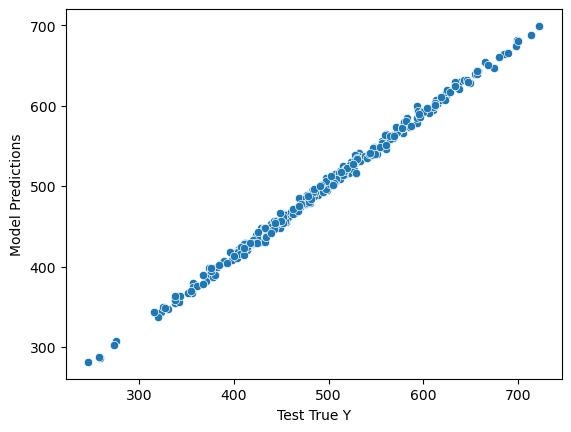

In [65]:
sns.scatterplot(x='Test True Y', y= 'Model Predictions', data=pred_df)

In [66]:
#The above chart represents the model is working very well

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

9.319370338603512

In [69]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [72]:
#Root mean Square error
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

11.626055334189301

In [73]:
new_gem = [[998, 1000]]

In [75]:
new_gem = scaler.transform(new_gem)

In [76]:
model.predict(new_gem)

1/1 [==============================] - 0s 33ms/step


array([[429.40448]], dtype=float32)

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save('my_gem_model.h5')

In [79]:
later_model = load_model('my_gem_model.h5')

In [80]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 198ms/step


array([[429.40448]], dtype=float32)